<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/Group_3_NLP_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 
import numpy as np
import pandas as pd
import re 
import nltk 
import keras
import tensorflow as tf
from tensorflow import keras

import random
import json
import pickle
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/AIML/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
#check if any column have missing value
def missing_val_cnt(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [ ]:
# Missing values
missing_val_cnt(df)

There is no missing value found.


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Dropping the first column 'Unnamed'
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [ ]:
#Rename column with meaningful label
df.rename(columns = {'Data':'Date & Timestamp'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


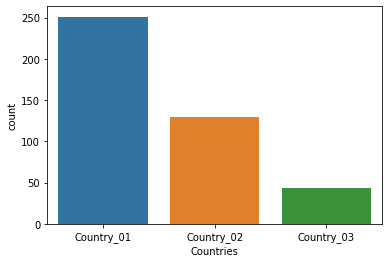

In [ ]:
#EDA- Visualisation and preprocessing of each variable
sns.countplot(df['Countries']);

In [ ]:
df['Countries'].replace(['Country_01', 'Country_02', 'Country_03'],[1,2,3], inplace=True)
df['Countries']=df['Countries'].astype(int)

In [ ]:
df['Local']=df['Local'].str[6:]
df['Local']=df['Local'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


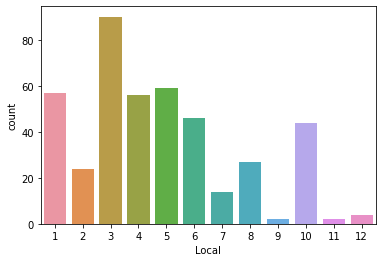

In [ ]:
sns.countplot(df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


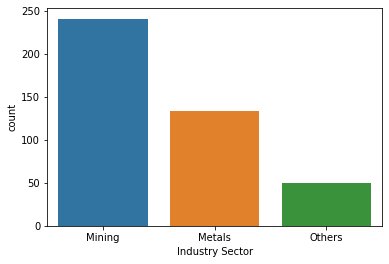

In [ ]:
sns.countplot(df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


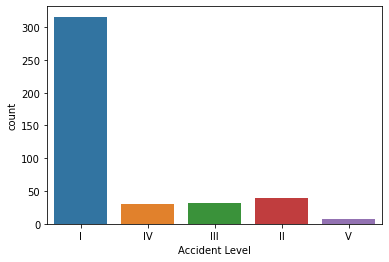

In [ ]:
sns.countplot(df['Accident Level']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


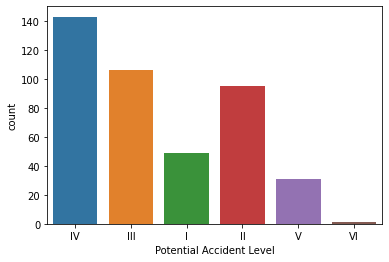

In [ ]:
sns.countplot(df['Potential Accident Level']);

In [ ]:
df['Accident Level']=df['Accident Level'].replace(['I','II','III','IV','V'],[1,2,3,4,5])
df['Accident Level']=df['Accident Level'].astype(int)

In [ ]:
df['Potential Accident Level']=df['Potential Accident Level'].replace(['I','II','III','IV','V','VI'],[1,2,3,4,5,6])
df['Potential Accident Level']=df['Potential Accident Level'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


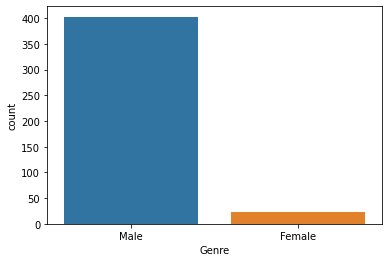

In [ ]:
sns.countplot(df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


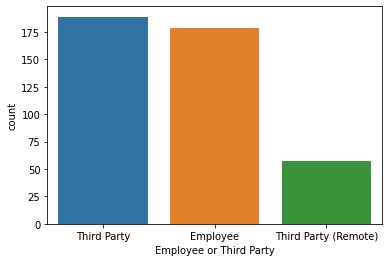

In [ ]:
sns.countplot(df['Employee or Third Party']);

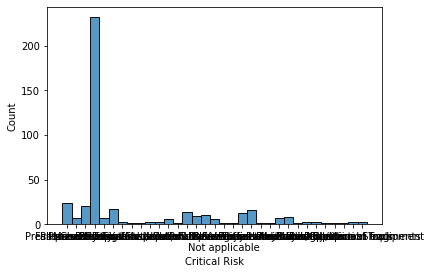

In [ ]:
sns.histplot(df['Critical Risk']);

In [ ]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [ ]:
df['Critical Risk'].nunique()

33

In [ ]:
df['Date'] = pd.to_datetime(df['Date & Timestamp'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

In [ ]:
#Defining seasons for months in Brazil
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [ ]:
df['Season'] = df['Month'].apply(month2seasons)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


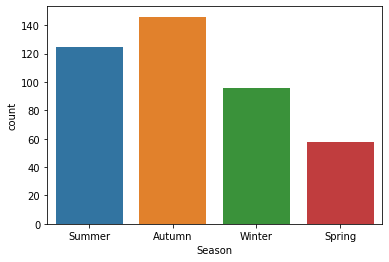

In [ ]:
sns.countplot(df['Season']);

In [ ]:
le=LabelEncoder()
df['Season']=le.fit_transform(df['Season'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


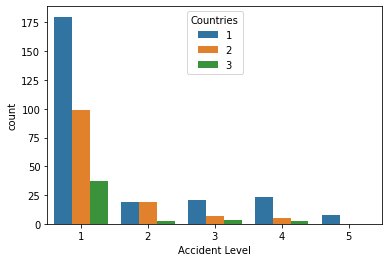

In [ ]:
#Bivariate analysis
sns.countplot(df['Accident Level'],hue=df['Countries']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


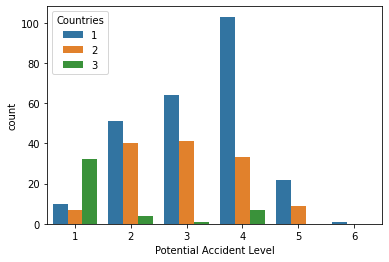

In [ ]:
sns.countplot(df['Potential Accident Level'],hue=df['Countries']);


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


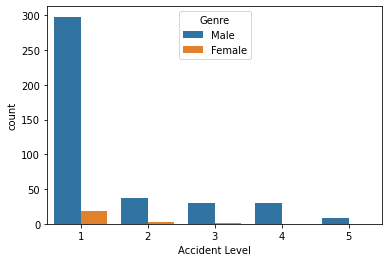

In [ ]:
sns.countplot(df['Accident Level'],hue=df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


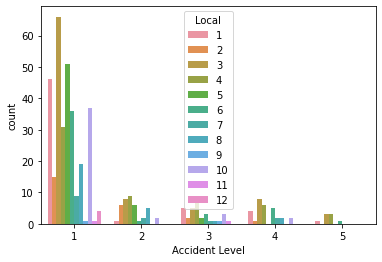

In [ ]:
sns.countplot(df['Accident Level'],hue=df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


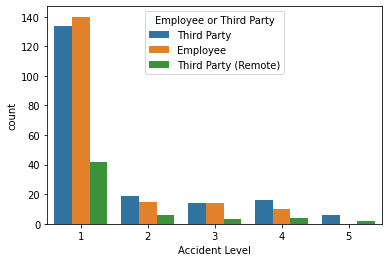

In [ ]:
sns.countplot(df['Accident Level'],hue=df['Employee or Third Party']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


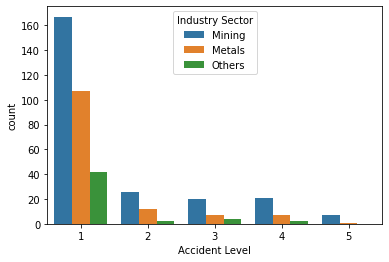

In [ ]:
sns.countplot(df['Accident Level'],hue=df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


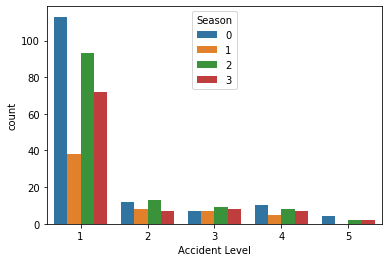

In [ ]:
sns.countplot(df['Accident Level'],hue=df['Season']);

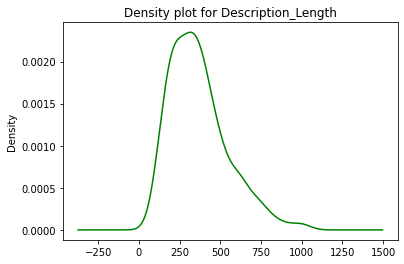

In [ ]:
#Analysing Description variable
df['Description_Length']=df['Description'].str.len()
df.Description_Length.plot.density(color='green')
plt.title('Density plot for Description_Length')
plt.show()

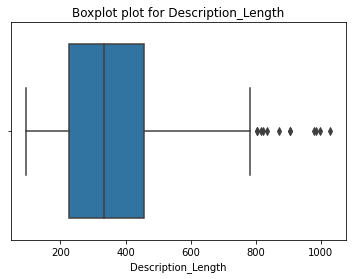

In [ ]:
sns.boxplot(x=df["Description_Length"])
plt.title('Boxplot plot for Description_Length')
plt.show()

In [ ]:
print('Average length of Description : ',df.Description.str.len().mean())
print('Maximum length of Description : ',df.Description.str.len().max())
print('Minimum length of Description : ',df.Description.str.len().min())

Average length of Description :  368.28
Maximum length of Description :  1029
Minimum length of Description :  94


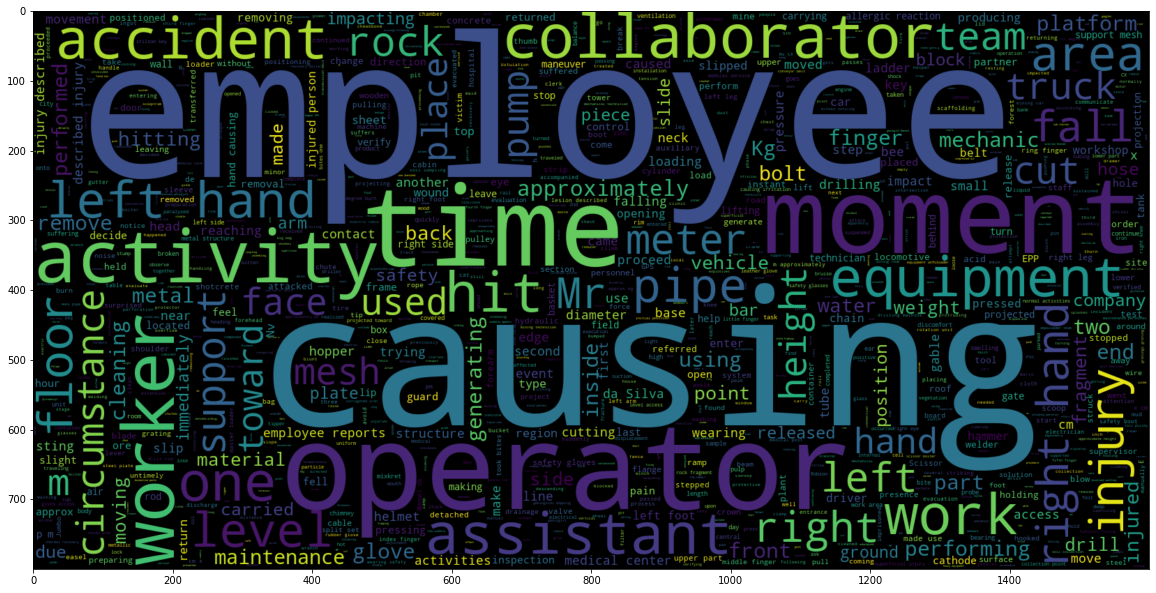

In [ ]:
#plotting the most frequent words with wordcloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Description'].values))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df['Description']))
len(tokenizer.word_counts)

3453

only 3453 words . including stop words


In [ ]:
#Analysing the frequent words
word_count_array = tokenizer.word_counts
word=[]
counts=[]
for key,val in word_count_array.items():
  word.append(key)
  counts.append(val)
df_cnt=pd.DataFrame(list(zip(word,counts)),columns=['word','count'])
df_cnt.nlargest(40,['count'])

,word,count
2,the,4355
5,of,1517
12,to,672
32,and,612
57,in,556
47,a,532
52,was,439
35,at,350
25,on,307
132,that,294


In [ ]:
#Preprocessing with NLP
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("</?.*?>"," <> ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma


def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [ ]:
df['normalized_Description'] = df['Description'].apply(normalize_text)

In [ ]:
#Encoding other categorical variables
df['Employee or Third Party']=le.fit_transform(df['Employee or Third Party'])
df['Critical Risk']=le.fit_transform(df['Critical Risk'])
df['Genre']=le.fit_transform(df['Genre'])
df['Industry Sector']=le.fit_transform(df['Industry Sector'])

In [ ]:
#Creating glove embeddings
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/My Drive/AIML/glove.6B.300d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:33, 11937.66it/s]

Found 400000 word vectors.


In [ ]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [ ]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
ind_glove_df=pd.DataFrame()
ind_glove_df = [sent2vec(x) for x in tqdm(df['normalized_Description'])]

100%|██████████| 425/425 [00:00<00:00, 1337.89it/s]


In [ ]:
ind_glove_df

[array([ 1.35815237e-02,  2.80350335e-02,  2.14226413e-04, -1.13321908e-01,
        -6.69960380e-02, -3.05887181e-02,  4.35785502e-02, -1.29087418e-02,
         1.09249325e-02, -3.70792419e-01, -5.98551445e-02,  5.11309914e-02,
         8.34678337e-02, -3.06120981e-02, -2.08009649e-02,  7.09988698e-02,
         5.45200985e-03, -5.62365353e-02, -4.04238142e-02,  5.50038600e-03,
         2.09819842e-02,  4.27179858e-02,  3.06225251e-02,  1.22728739e-02,
        -4.54546772e-02,  1.78878177e-02, -6.04456756e-03,  1.70967113e-02,
        -1.93235949e-02,  2.59655640e-02,  3.26969586e-02,  4.82973307e-02,
         3.36499363e-02,  1.99581124e-02, -1.63427800e-01,  1.19845159e-01,
         1.22884465e-02, -2.18588840e-02, -7.22850626e-03,  6.09267727e-02,
        -8.56599808e-02,  7.08565488e-02, -2.72245836e-02, -6.69601709e-02,
         3.01329303e-03, -2.26527508e-02,  4.59771901e-02,  1.50181474e-02,
         6.92297122e-04,  4.60081408e-03,  9.87862051e-03,  7.30733015e-03,
         4.5

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True)
    vec_tfidf.fit(df['normalized_Description'])
    X = vec_tfidf.transform(df['normalized_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0
3,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0,...,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0
4,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0,...,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0


In [ ]:
df = df.join(pd.DataFrame(ind_tfidf_df).iloc[:,0:30].reset_index(drop=True))

In [ ]:
df.columns

Index(['Date & Timestamp', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description', 'Date',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'Season',
       'Description_Length', 'normalized_Description', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time', 'TFIDF_activity', 'TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury', 'TFIDF_left', 'TFIDF_moment',
       'TFIDF_operator', 'TFIDF_right', 'TFIDF_time', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time'],
      dtype='object')

In [ ]:
X=df.drop(['Date & Timestamp','Accident Level','Potential Accident Level','Description','normalized_Description','Date','Year','Month','Day','WeekofYear','Weekday','Description_Length'],axis=1)
Y=np.array(df['Accident Level'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 340
Validation utterances: 85


In [ ]:
X.head(3)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Season,TFIDF_activity,TFIDF_causing,TFIDF_employee,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,1,1,1,1,1,20,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.0,0.0
1,2,2,1,1,0,21,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1,3,1,1,2,15,2,0.0,0.469521,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.0,0.0


In [ ]:
#Building basic models
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
predrf = model_rf.predict(X_test)
print('RF_Score:', accuracy_score(y_test, predrf))

RF_Score: 0.7647058823529411


In [ ]:

model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
preddt = model_dt.predict(X_test)
print('DT_Score:', accuracy_score(y_test, preddt))

DT_Score: 0.6588235294117647


In [ ]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predknn=knn_clf.predict(X_test)
print('Accuracy of KNN : ',accuracy_score(y_test,predknn))

Accuracy of KNN :  0.8117647058823529


In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
### Here we can use the DummyClassifier to predict all accident levels just to show how misleading accuracy can be.
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

In [ ]:
#Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [ ]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

In [ ]:
###Train and test all models

import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1
    print(resultDf_common)
    return resultsDf_common
    

In [ ]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_
    